# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print(df.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'deck' 'embark_town' 'alive' 'alone']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 15)

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
mean_ages = df.groupby(['sex','pclass'])['age'].mean()
display(mean_ages)

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [9]:
def replace_nan_age(row):
    if pd.isnull(row['age']):
        return mean_ages[row['sex'], row['pclass']]
    else:
        return row['age']
    
df['age'] = df.apply(replace_nan_age, axis=1)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Data Visualization

Draw scatterplot for distribution of survivors by gender

In [26]:
def scatter(passengers, marker='o', legend_prefix=''):
    survived = passengers[passengers.survived == 1]
    x = survived.sex
    y = survived.age
    plt.scatter(x,y, c='blue', alpha=1, marker=marker, label=legend_prefix + ' Survived')

def scatter_plot():
    class_passengers = df[df.alive=='yes']
    
    male_passengers = class_passengers[class_passengers.sex == 'male']
    female_passengers = class_passengers[class_passengers.sex == 'female']
    
    scatter(male_passengers, marker='o', legend_prefix='Male')
    scatter(female_passengers, marker='^',  legend_prefix='Female')

    plt.legend(bbox_to_anchor=(0,1), loc='best') # bbox - to move legend out of plot/scatter
    plt.xlabel('sex')
    plt.ylabel('age')
    plt.title('Survival by Gender')

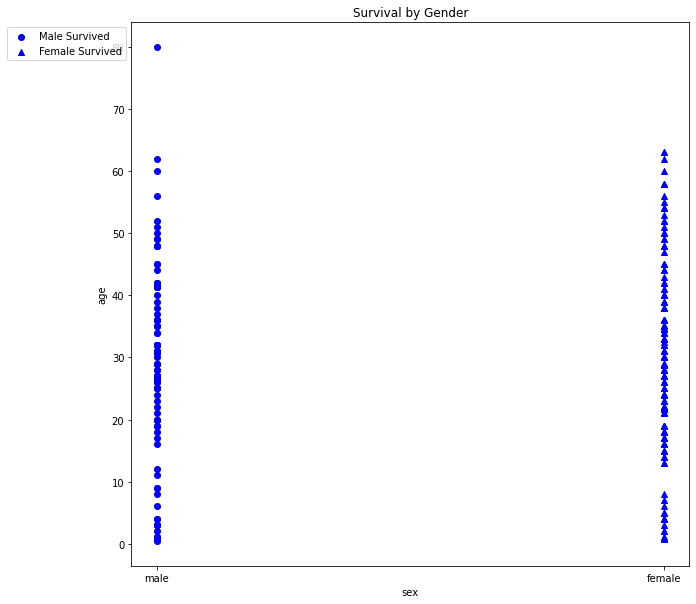

In [29]:
plt.figure(figsize=(10, 10))
scatter_plot()

Calculate mean of survivors

In [12]:
survival_rate = df.groupby(['sex']).mean()[['survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,survived
sex,
female,0.742038
male,0.188908


Generate uniform distribution

In [13]:
male_pos = np.random.uniform(0, male_rate, len(df[(df['sex']=='male') & (df['survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(df[(df['sex']=='male') & (df['survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(df[(df['sex']=='female') & (df['survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(df[(df['sex']=='female') & (df['survived']==0)]))


Combine the scatter plot for survivals of male and female in the same figure. Show different colors and intensities to add more information to the plot.

In [14]:
def scatter(passengers, marker='o', legend_prefix=''):
    survived = passengers[passengers.survived == 1]
    died = passengers[passengers.survived == 0]

    x = survived.age
    y = survived.fare
    plt.scatter(x, y, c='blue', alpha=0.5, marker=marker, label=legend_prefix + ' Survived')

    x = died.age
    y = died.fare
    plt.scatter(x, y, c='red', alpha=0.5, marker=marker, label=legend_prefix + ' Died')

def scatter_plot(pclass):
    class_passengers = df[df.pclass == pclass]
    
    male_passengers = class_passengers[class_passengers.sex == 'male']
    female_passengers = class_passengers[class_passengers.sex == 'female']
    
    scatter(male_passengers, marker='o', legend_prefix='Male')
    scatter(female_passengers, marker='^', legend_prefix='Female')

    plt.legend(bbox_to_anchor=(0,1), loc='best') # bbox - to move legend out of plot/scatter
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Gender survival by Age, for Pclass = ' + str(pclass))

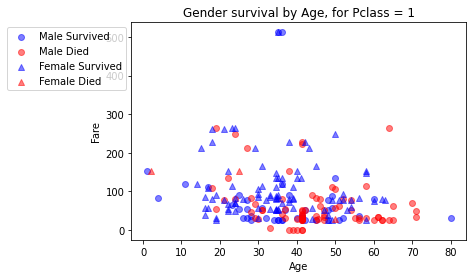

In [15]:
scatter_plot(1)

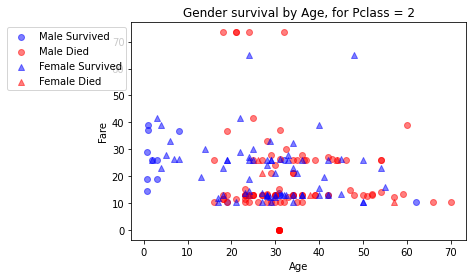

In [16]:
scatter_plot(2)

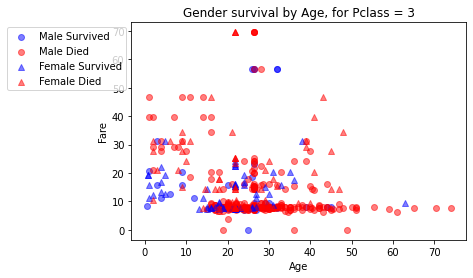

In [17]:
scatter_plot(3)

Bar + Scatter Plot (Stripplot) A strip plot is a scatter plot where one of the variables is categorical.

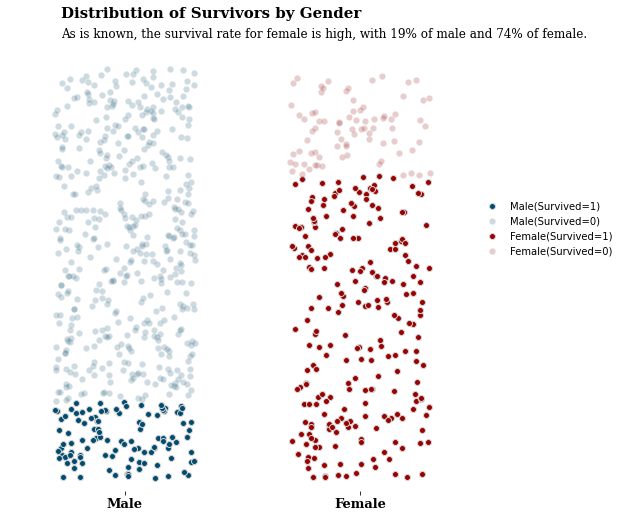

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
np.random.seed(42)

# male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')


# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')


# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()